## MET CS 521 Final Project: <br> Predicting Housing Prices (Linear Regression) 
#### <i>Due: Friday, May 13th, 2022, 11:59PM EST</i>

Authors: Daniela Demaestri and Alex Mao<br>
GitHub usernames: ddemaest-bu and alexmao0501


## Preparing environment, importing modules, and taking a quick look at the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Importing and reading csv file using pandas.

In [2]:
housing = pd.read_csv('h.csv')

In [3]:
# preview dataset:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


#### Dataset shape - (# rows, # columns).
There are 2,919 rows and 81 columns

In [4]:
housing.shape

(2919, 81)

#### Preview some basic dataset information.
Some quick observations:
More than half of the columns (43) store "object" datatypes and, in other words, most likely refer to qualitative data. 38 columns contain numeric data (26 columns contain integer datatype and 12 columns conntain floats.)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## 1. Cleaning and Processing the Data

#### Handling Nulls/Missing Values in the Dataset:

In [6]:
#check for columns with null values:
null_housing = housing.isnull().sum()
print(null_housing[null_housing > 0])

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


#### Handling SalePrice Nulls:

There are 1459 null values in the SalePrice column, the target variable. This is 49.98% of the rows. 

We will drop these nulls as there is no point in using this data when the goal is to build a model to predict SalePrice.

In [7]:
# make a copy of the original dataset
original_h = housing.copy()

In [8]:
# dropping rows with null values in 'SalePrice'
housing.dropna(subset = ["SalePrice"], inplace=True)

In [9]:
# new shape of data
housing.shape

(1460, 81)

#### Handling nulls by column

In [10]:
#check for columns with null values for new housing df:
null_housing = housing.isnull().sum()
print(null_housing[null_housing > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Let's remove the columns that we won't be interested given the high amount of null values. The features we will be removing include:
- PoolQC
- MiscFeature
- Alley
- Fence
- FireplaceQu

We can also deduce that the reason behind the high quantity of nulls for these columns is due to the fact the these features may not be present in all houses. In other words not all houses have pools, alleys, fences, fireplaces. 

In [11]:
columns_drop = null_housing[null_housing > 600] 
columns_drop.index

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [12]:
# Since we dropped "MiscFeature", we should also drop "MiscVal"
columns_to_drop = list(columns_drop.index)
columns_to_drop.append("MiscVal")
columns_to_drop

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']

In [13]:
# dropping these columns:
housing = housing.drop(columns_to_drop, axis = 1)

#### Basement Variables/Features:
Looking at the data description there seems to be nine features that relate to describing/rating basements. To simplify what basement features to focus on, I chose to focus on the following as they seem to indicate a more generalized description of the basement and decided to drop the others basement features.

- BsmtQual
- BsmtCond
- BsmtExposure
- TotalBsmtSF

In [14]:
# dropping basement columns:
basement_drop = ['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF']
housing = housing.drop(basement_drop, axis = 1)

In [15]:
#check for columns with null values for new housing df:
null_housing = housing.isnull().sum()
print(null_housing[null_housing > 0])

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


change the nulls from the basement and garage features to "N/A" as the data descriptions indicate that these features do not have basements or garages. (we will figure out later how to deal with these nulls).

In [16]:
housing.loc[:, "BsmtQual"] = housing.loc[:, "BsmtQual"].fillna("N/A")
housing.loc[:, "BsmtCond"] = housing.loc[:, "BsmtCond"].fillna("N/A")
housing.loc[:, "BsmtExposure"] = housing.loc[:, "BsmtExposure"].fillna("N/A")
housing.loc[:, "GarageType"] = housing.loc[:, "GarageType"].fillna("N/A")
housing.loc[:, "GarageYrBlt"] = housing.loc[:, "GarageYrBlt"].fillna(0)
housing.loc[:, "GarageFinish"] = housing.loc[:, "GarageFinish"].fillna("N/A")
housing.loc[:, "GarageQual"] = housing.loc[:, "GarageQual"].fillna("N/A")
housing.loc[:, "GarageCond"] = housing.loc[:, "GarageCond"].fillna("N/A")

Handling remaining nulls for the following variables:
- Electrical 
- MasVnrArea
- MasVnrType

In [17]:
# Let's simply replace the one null value for Electrical with the mode
electrical_mode = housing['Electrical'].mode()[0]
housing.loc[:, "Electrical"] = housing.loc[:, "Electrical"].fillna(electrical_mode)

In [18]:
# Let's simply replace the null values for MasVnrType with the mode
MasVnrType_mode = housing['MasVnrType'].mode()[0]
housing.loc[:, "MasVnrType"] = housing.loc[:, "MasVnrType"].fillna(str(MasVnrType_mode))

In [19]:
# Let's simply replace the null values from MasVnrArea with 0 if MasVnrType == "None" 
housing['MasVnrArea'] = np.where((housing['MasVnrType'] == "None") & (housing['MasVnrArea'].isnull()==True), 0, housing['MasVnrArea'])

In [20]:
#recheck columns for null values:
null_housing = housing.isnull().sum()
print(null_housing[null_housing > 0])

LotFrontage    259
dtype: int64


In [21]:
# Replacing null values from LotFrontage with 0 
#(we are assuming that nulls mean that the house in question does not have stree conntected to their property)
housing.loc[:, "LotFrontage"] = housing.loc[:, "LotFrontage"].fillna(0)

#### Can we encode some categorical variables further to numerical values?

Looking at the data description a few categorical variables seem to have an implicit order. Hence, we can encode these categorical variables as ordered numbers (similar to how OverallCond is encoded). The variables I will be encoding numerically are:

- LotShape
- Utilities
- AllPub
- LandSlope
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageFinish
- GarageQual
- GarageCond

In [22]:
housing = housing.replace({"LotShape" : {"Reg":4, "IR1":3, "IR2":2, "IR3":1},
                 "Utilities":{"AllPub":4, "NoSewr":3,"NoSeWa":2,"ELO":1},
                           "LandSlope":{"Gtl":3,"Mod":3,"Sev":1},
                          "ExterQual":{"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
                           "ExterCond":{"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
                           "BsmtQual":{"N/A":0,"Po":1, "Fa":2,"TA":3,"Gd":4,"Ex":5},
                           "BsmtExposure":{"N/A":0,"No":1, "Mn":2,"Av":3,"Gd":4},
                          "BsmtCond":{"N/A":0,"Po":1, "Fa":2,"TA":3,"Gd":4,"Ex":5},
                          "HeatingQC":{"Po":1, "Fa":2,"TA":3,"Gd":4,"Ex":5},
                          "KitchenQual":{"Po":1, "Fa":2,"TA":3,"Gd":4,"Ex":5},
                          "FireplaceQu":{"Po":1, "Fa":2,"TA":3,"Gd":4,"Ex":5},
                          "GarageFinish":{"N/A":0,"Unf":1, "RFn":2,"Fin":3},
                          "GarageQual":{"N/A":0,"Po":1, "Fa":2,"TA":3,"Gd":4,"Ex":5},
                          "GarageCond":{"N/A":0,"Po":1, "Fa":2,"TA":3,"Gd":4,"Ex":5}})

In [23]:
# dropping Id
housing = housing.drop("Id", axis = 1)

#### Are all the numerical variables actually quantitative?
Looking at the data description, we can help solve which numerical features aren't actually quantitative. For example:
- Id (we can simply drop since this is acts like an index)
- MoSold
- MSSubClass

In [24]:
# Replacing MoSold numerics to object/string categories
housing['MoSold'] = pd.to_datetime(housing['MoSold'], format='%m').dt.month_name().str.slice(stop=3)

In [25]:
# Let's simply change the numbers to strings for MSSubClass for now
MSSubClass_options = list(housing['MSSubClass'].unique())
MSSubClass_options_str = []
for item in MSSubClass_options:
    MSSubClass_options_str.append(str(item))
num_str_dct = {}
for i in range(len(MSSubClass_options_str)):
    num_str_dct[MSSubClass_options[i]] = MSSubClass_options_str[i]

In [26]:
housing = housing.replace({"MSSubClass" : num_str_dct})

## 2. Exploratory Data Analysis (EDA) - Getting a better understanding of the data 

#### Summary statistics for columns with quantitative data 

In [27]:
# view descriptive info for columns with object datatypes
housing.describe(exclude='number').T

,count,unique,top,freq
MSSubClass,1460,15,20,536
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LandContour,1460,4,Lvl,1311
LotConfig,1460,5,Inside,1052
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445
BldgType,1460,5,1Fam,1220
HouseStyle,1460,8,1Story,726


#### Summary statistics for columns with qualitative data 

In [28]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
LotShape,1460.0,3.591781,0.582296,1.0,3.00,4.0,4.00,4.0
Utilities,1460.0,3.998630,0.052342,2.0,4.00,4.0,4.00,4.0
LandSlope,1460.0,2.982192,0.187945,1.0,3.00,3.0,3.00,3.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0


### Taking a closer look at our target variable: SalePrice

Just taking a look at the distribution of Sale Price, we can see the graph is right-skewed.

''

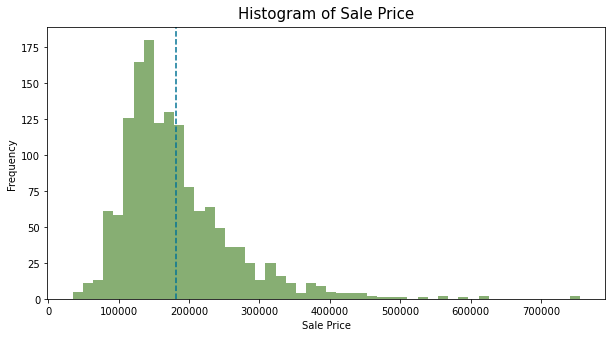

In [29]:
housing_saleprice_hist = housing.SalePrice.plot(kind='hist', figsize= (10,5), bins=50,color=('#87ae73'));
housing_saleprice_hist.set_title('Histogram of Sale Price', fontsize=15, y=1.01);
plt.xlabel('Sale Price')
housing_saleprice_hist.axvline(np.mean(housing['SalePrice']), color='#047495', linestyle='--') # Add mean to the histogram
;

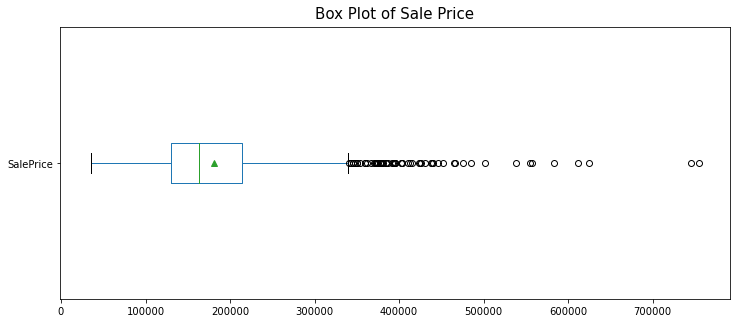

In [30]:
box_plot_saleprice = housing.SalePrice.plot(kind='box', figsize= (12,5),vert=False, showmeans=True);
box_plot_saleprice.set_title('Box Plot of Sale Price', fontsize=15, y=1.01);

In [31]:
#get mean sale price:
saleprice_mean = housing.SalePrice.mean()
saleprice_mean

180921.19589041095

In [32]:
#get median sale price:
saleprice_median = housing.SalePrice.median()
saleprice_median

163000.0

#### What is the relationship between Sale Price and Lot Area?

In the graph below, we can observe quite a few outliers when it comes to Lot Area. By removing the outliers, we can take a better look at the relationship between Sale Price and Lot Area.

To determine the outliers, we can use the IQR (Inter Quartile Range) approach where we find the upper and lower bound. An outlier are values that are above and below the datasets normal range (above the upper bound and below the lower bound).

When looking at the graph without the outliers, you can observe a slight positive correlatation between Sale Price and Lot Area.

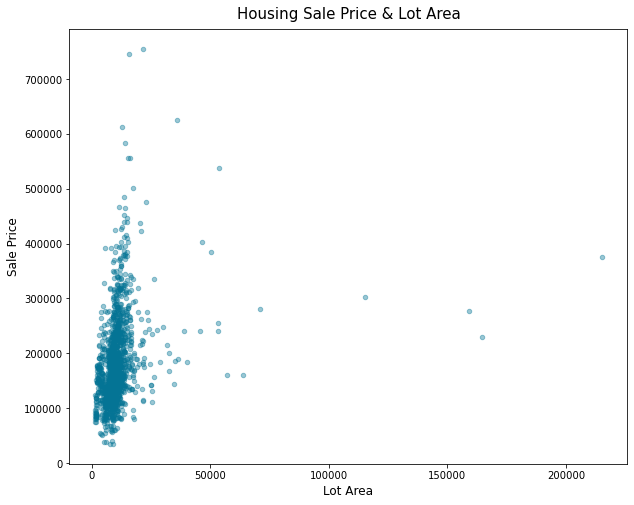

In [33]:
lotarea_saleprice = housing.plot(kind='scatter', x='LotArea', y='SalePrice', figsize=(10, 8), color = ('#047495'), alpha = 0.4);
lotarea_saleprice.set_title('Housing Sale Price & Lot Area', fontsize=15, y=1.01);
plt.xlabel('Lot Area', fontsize=12);
plt.ylabel('Sale Price', fontsize=12);

In [34]:
def IQR_outliers(df,variable):
    # IQR
    Q1 = np.percentile(df[variable], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(df[variable], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
 
    print("Shape (with outliers): ", df.shape)
 
    # Upper bound
    upper = np.where(df[variable] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[variable] <= (Q1-1.5*IQR))
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print("lower bound: ", lower_bound)
    print("upper bound: ", upper_bound)
    return upper_bound

In [35]:
upper_bound = IQR_outliers(housing,'LotArea')

Shape (with outliers):  (1460, 69)
lower bound:  1468.0
upper bound:  17684.0


##### Sale Price vs. Lot Area (without outliers) with regression line

(1000.0, 18000.0)

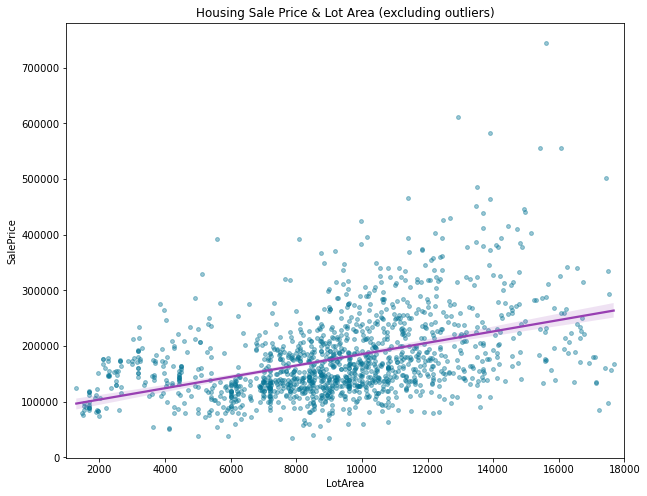

In [36]:
ax = sns.regplot(x="LotArea", y="SalePrice", data=housing[housing['LotArea']<upper_bound], line_kws={"color": "#983fb2"}, scatter_kws={"color": "#047495",'s':15, 'alpha':0.4})
ax.set(title='Housing Sale Price & Lot Area (excluding outliers)')
ax.figure.set_size_inches(10, 8)
ax.set_xlim(1000, 18000)


#### What is the relationship between Sale Price and # Bedrooms?

When I think of houses, I usually assume that houses with more bedrooms will cost more. Let's check if this is true...

There doesn't seem to show a strong relationship between sale price and the number of bedrooms as I initially thought.

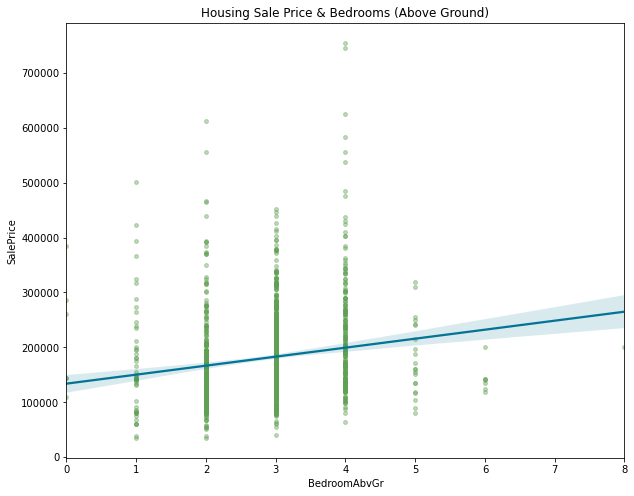

In [37]:

ax = sns.regplot(x="BedroomAbvGr", y="SalePrice", data=housing, line_kws={"color": "#047495"}, scatter_kws={"color": "#5fa052",'s':15, 'alpha':0.4})
ax.set(title='Housing Sale Price & Bedrooms (Above Ground)')
ax.figure.set_size_inches(10, 8)




### Correlation Heat Map

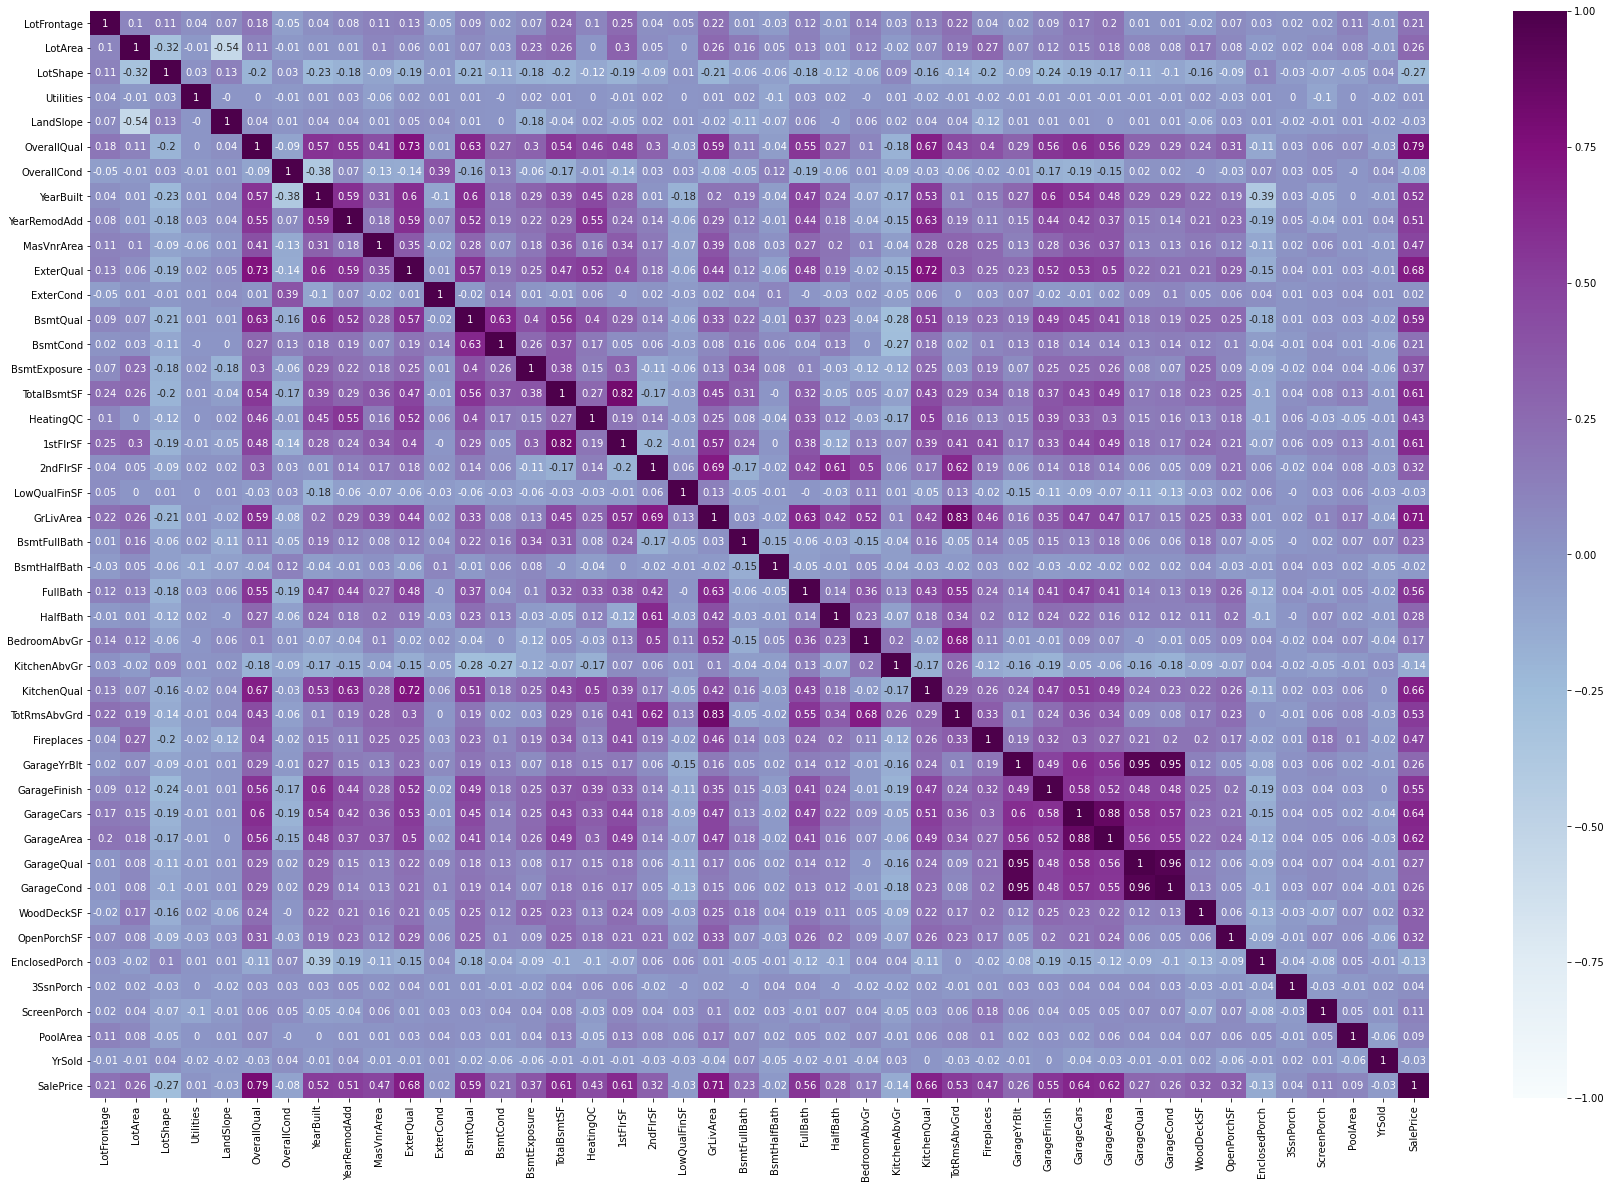

In [38]:
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(housing.corr().round(decimals=2), vmin=-1, vmax=1,annot=True, cmap='BuPu')

### Which housing features are correlated with sale price?

In [39]:
corr_saleprice = pd.DataFrame(housing.corrwith(housing.SalePrice).sort_values(ascending=False), columns = ['correlation'])

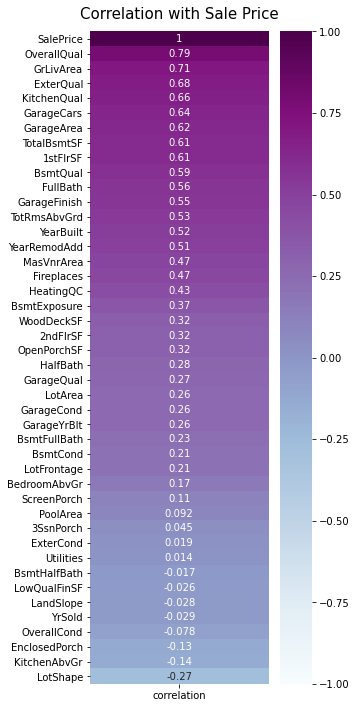

In [40]:
plt.figure(figsize=(4, 12))
heat_saleprice_corr = sns.heatmap(corr_saleprice, vmin=-1, vmax=1,annot=True, cmap='BuPu')
heat_saleprice_corr.set_title('Correlation with Sale Price', fontsize=15, y=1.01);

##### Let's take a closer look at the top features correlated with Sale Price and only look at those with a correlation that is greater than the abs(0.50).

In [41]:
top_corr_saleprice = pd.DataFrame(housing.corrwith(housing.SalePrice)[abs(housing.corrwith(housing.SalePrice))>0.50].sort_values(ascending=False), columns = ['correlation'])

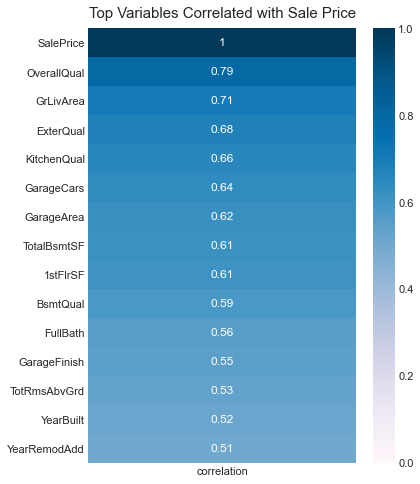

In [83]:
plt.figure(figsize=(6, 8))
heat_saleprice_corr = sns.heatmap(top_corr_saleprice, vmin=0, vmax=1,annot=True, cmap='PuBu')
heat_saleprice_corr.set_title('Top Variables Correlated with Sale Price', fontsize=15, y=1.01);

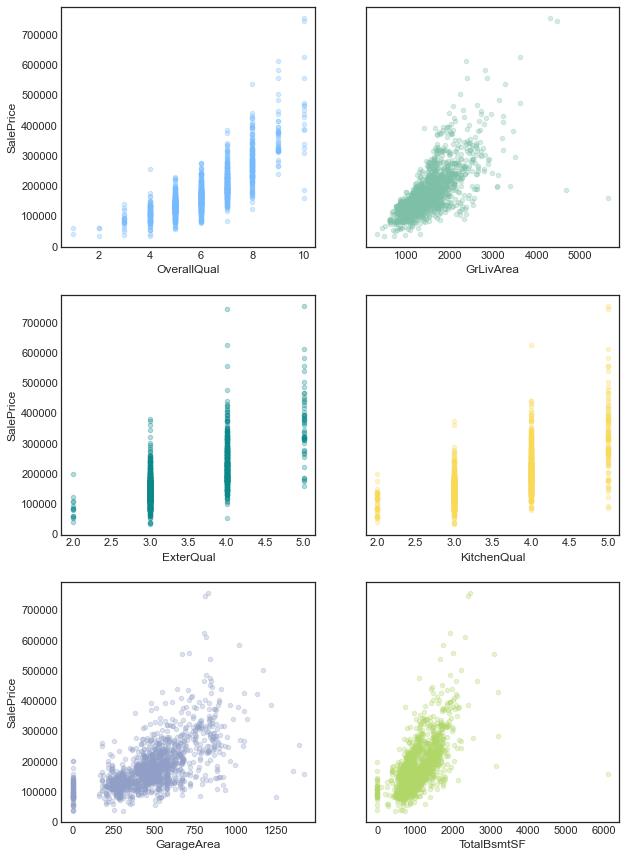

In [87]:
# scatter plots to view the relationship between top 6 correlated housing features and SalePrice 
# (skipping GarageCars because GarageCars and GarageArea describe the same housing area)
feature_cols = ["OverallQual","GrLivArea","ExterQual","KitchenQual","GarageArea","TotalBsmtSF"]

# Multiple scatterplots in Pandas
fig, axs = plt.subplots(3, 2, sharey=True)

housing.plot(kind='scatter', x=feature_cols[0], y='SalePrice', ax=axs[0,0], figsize=(10, 15),alpha = 0.3, color = '#75bbfd')

housing.plot(kind='scatter', x=feature_cols[1], y='SalePrice', ax=axs[0,1], figsize=(10, 15),alpha = 0.3, color=(0.491,0.751,0.655))

housing.plot(kind='scatter', x=feature_cols[2], y='SalePrice', ax=axs[1,0], figsize=(10, 15),alpha = 0.3, color = '#0a888a')

housing.plot(kind='scatter', x=feature_cols[3], y='SalePrice', ax=axs[1,1], figsize=(10, 15),alpha = 0.3, color = (0.978,0.855,0.337))

housing.plot(kind='scatter', x=feature_cols[4], y='SalePrice', ax=axs[2,0], figsize=(10, 15),alpha = 0.3, color = (0.570,0.623,0.780))

housing.plot(kind='scatter', x=feature_cols[5], y='SalePrice', ax=axs[2,1], figsize=(10, 15),alpha = 0.3, color=(0.689,0.842,0.404))

plt.show()

#### Multicollinearity between features:
Some housing features seem to be highly correlated to each other. For example: 

- GarageArea and GarageCars (0.88)
- TotRmsAbvGrd and GrLivArea (0.83)
- 1stFlrSF and TotalBsmtSF (0.82)
- ExterQual and OverallQual (0.73)
- KitchenQual and ExterQual (0.72)

Hence, multicollinearity exists, which may be a problem for multiple regression modeling/equations because multicollinearity undermines the statistical significance of an independent variable.
 
The easiest solution is making sure to remove the highly correlated independent variables from models. Another solution is to combine the highly correlated independent variables into new variables. I will focus on the former for this project. 

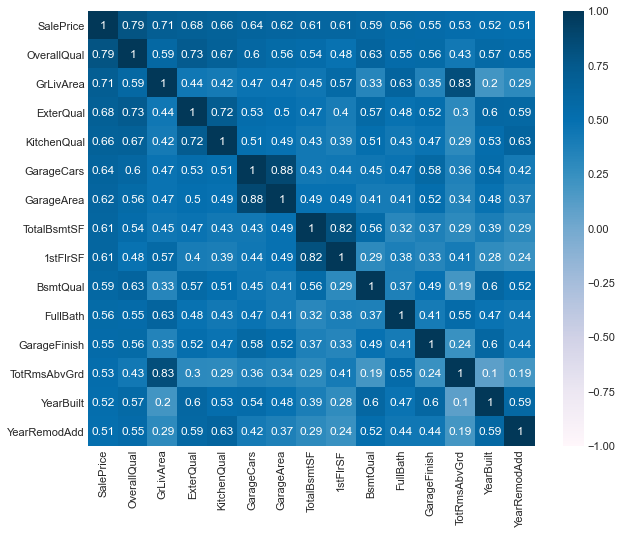

In [88]:
#let's view a correlation matrix of  the top corr features only
plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(housing[top_corr_saleprice.index].corr().round(decimals=2), vmin=-1, vmax=1,annot=True, cmap='PuBu')

#### What is the relationship between Sale Price and Overall Quality?

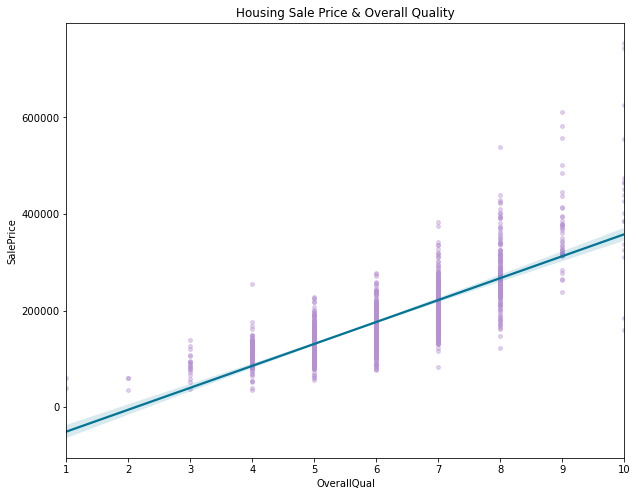

In [45]:
ax = sns.regplot(x="OverallQual", y="SalePrice", data=housing, line_kws={"color": "#047495"}, scatter_kws={"color": "#b790d4",'s':15, 'alpha':0.4})
ax.set(title='Housing Sale Price & Overall Quality')
ax.figure.set_size_inches(10, 8)


#### What is the relationship between Sale Price and GrLivArea?

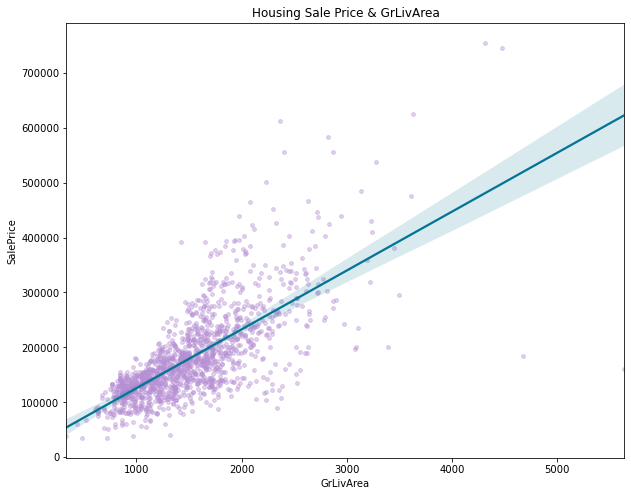

In [46]:
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=housing, line_kws={"color": "#047495"}, scatter_kws={"color": "#b790d4",'s':15, 'alpha':0.4})
ax.set(title='Housing Sale Price & GrLivArea')
ax.figure.set_size_inches(10, 8)

#### Taking a look at Sale Condition

In [47]:
def bar_perc(data, variable):
    
    total = len(data[variable]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(x=data[variable],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
    plt.show() # show the plot

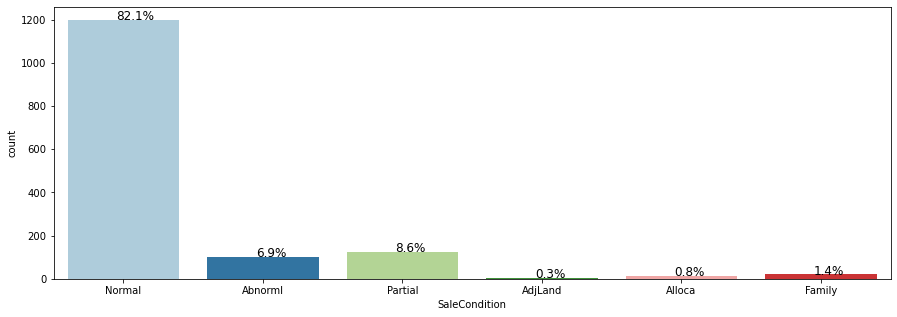

In [48]:
bar_perc(housing, 'SaleCondition')

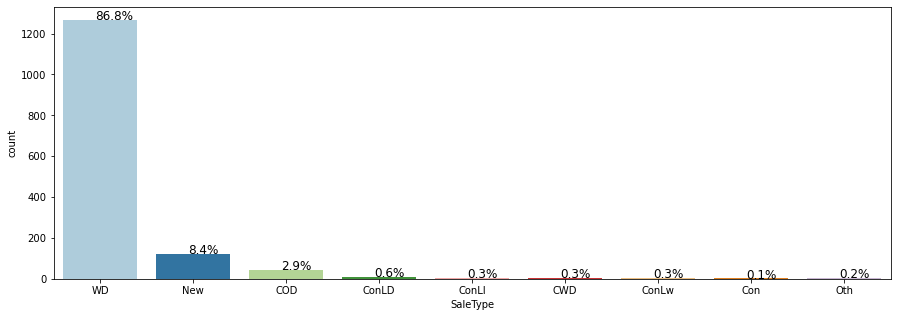

In [49]:
bar_perc(housing, 'SaleType')

In [50]:
outsidesurr_df = housing[['MSZoning', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'PavedDrive', 
                    'Street', 'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType', 'LotShape', 
                     'SaleCondition', 'SalePrice']]

building_df = housing[['MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Functional', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SaleType',
                    'SaleCondition', 'SalePrice']]

utilities_df = housing[['Utilities', 'Heating', 'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MoSold',
                     'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

ratings_df = housing[['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                      'HeatingQC', 'KitchenQual', 'GarageCond', 'GarageQual', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

rooms_df = housing[['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
                    , 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','TotRmsAbvGrd', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
                 'SaleCondition', 'SalePrice']]

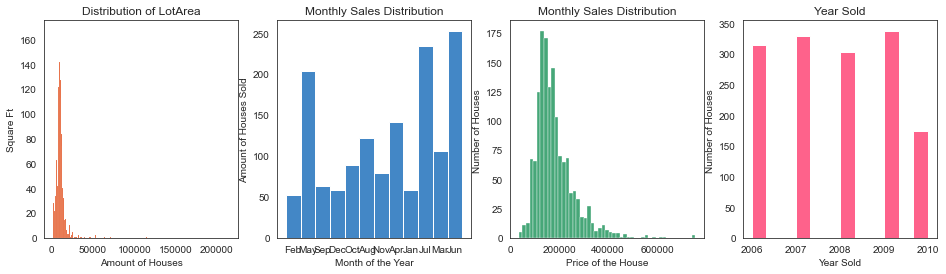

In [51]:
import seaborn as sns
sns.set_style('white')

f, axes = plt.subplots(ncols=4, figsize=(16,4))

# Lot Area: In Square Feet
sns.histplot(housing['LotArea'], kde=False, color="#DF3A01", ax=axes[0]).set_title("Distribution of LotArea")
axes[0].set_ylabel("Square Ft")
axes[0].set_xlabel("Amount of Houses")

# MoSold: Year of the Month sold
sns.histplot(housing['MoSold'], kde=False, color="#045FB4", ax=axes[1]).set_title("Monthly Sales Distribution")
axes[1].set_ylabel("Amount of Houses Sold")
axes[1].set_xlabel("Month of the Year")

# House Value
sns.histplot(housing['SalePrice'], kde=False, color="#088A4B", ax=axes[2]).set_title("Monthly Sales Distribution")
axes[2].set_ylabel("Number of Houses ")
axes[2].set_xlabel("Price of the House")

# YrSold: Year the house was sold.
sns.histplot(housing['YrSold'], kde=False, color="#FE2E64", ax=axes[3]).set_title("Year Sold")
axes[3].set_ylabel("Number of Houses ")
axes[3].set_xlabel("Year Sold")

plt.show()

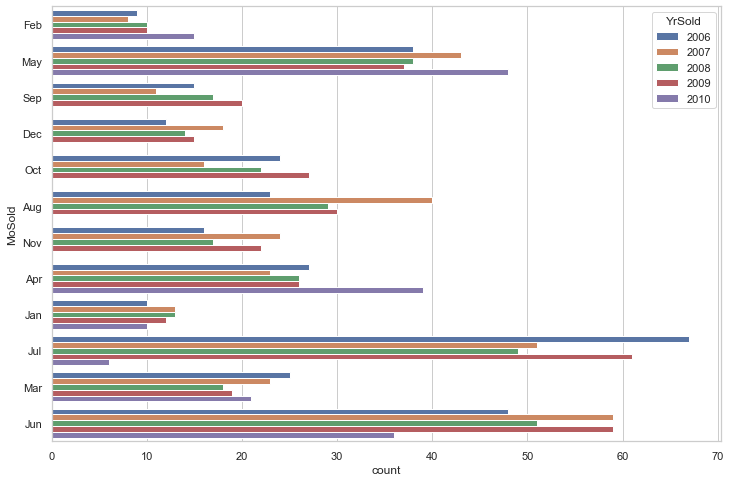

In [52]:
# People tend to move during the summer
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.countplot(y="MoSold", hue="YrSold", data=housing)
plt.show()

Text(0.5, 1.0, 'Houses Sold per Year')

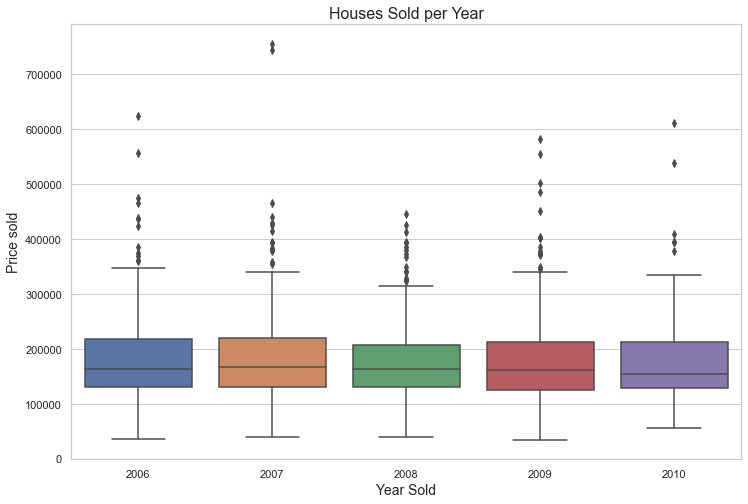

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x='YrSold', y='SalePrice', data=housing)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price sold', fontsize=14)
plt.title('Houses Sold per Year', fontsize=16)

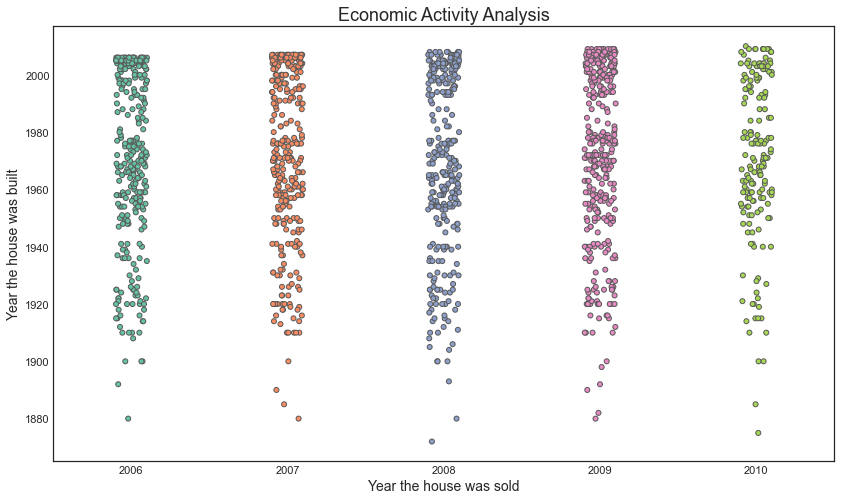

In [54]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-white')
sns.stripplot(x='YrSold', y='YearBuilt', data=housing, jitter=True, palette="Set2", linewidth=1)
plt.title('Economic Activity Analysis', fontsize=18)
plt.xlabel('Year the house was sold', fontsize=14)
plt.ylabel('Year the house was built', rotation=90, fontsize=14)
plt.show()

In [55]:
outsidesurr_df.describe()

,LotArea,LandSlope,YrSold,LotShape,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,2.982192,2007.815753,3.591781,180921.195890
std,9981.264932,0.187945,1.328095,0.582296,79442.502883
min,1300.000000,1.000000,2006.000000,1.000000,34900.000000
25%,7553.500000,3.000000,2007.000000,3.000000,129975.000000
50%,9478.500000,3.000000,2008.000000,4.000000,163000.000000
75%,11601.500000,3.000000,2009.000000,4.000000,214000.000000
max,215245.000000,3.000000,2010.000000,4.000000,755000.000000


In [56]:
outsidesurr_df.columns

Index(['MSZoning', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2',
       'PavedDrive', 'Street', 'LandContour', 'LandSlope', 'LotConfig',
       'MoSold', 'YrSold', 'SaleType', 'LotShape', 'SaleCondition',
       'SalePrice'],
      dtype='object')

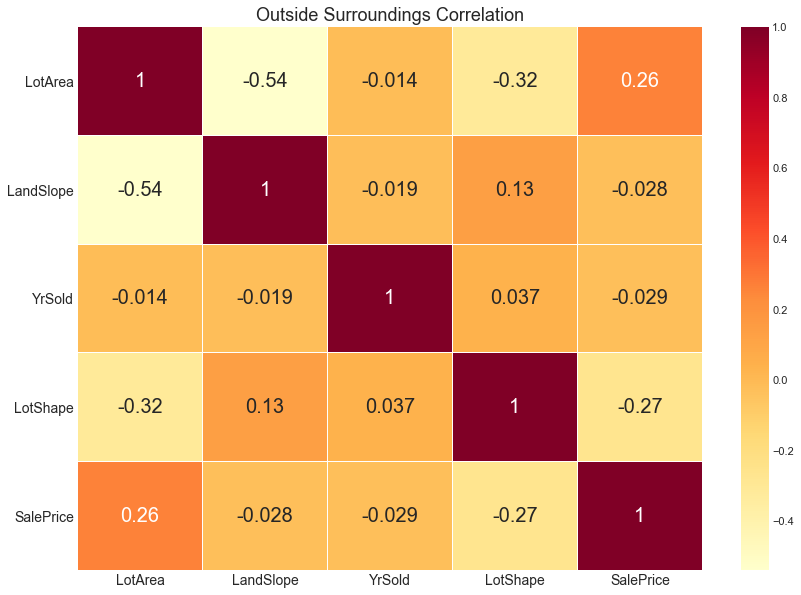

In [57]:
# Lot Area and Lot Frontage influenced hugely on the price. 
# However, YrSold does not have that much of a negative correlation with SalePrice as we previously thought.
# Meaning the state of IOWA was not affected as other states.
plt.style.use('seaborn-white')
corr = outsidesurr_df.corr()

sns.heatmap(corr,annot=True,cmap='YlOrRd',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title("Outside Surroundings Correlation", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

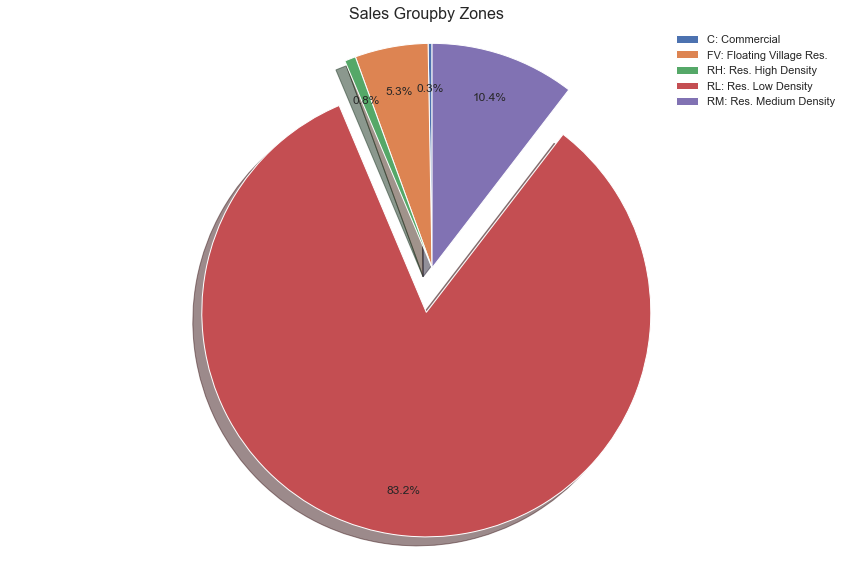

In [58]:
# We already know which neighborhoods were the most sold but which neighborhoods gave the most revenue. 
# This might indicate higher demand toward certain neighborhoods.
plt.style.use('seaborn-white')
zoning_value = housing.groupby(by=['MSZoning'], as_index=False)['SalePrice'].sum()
zoning = zoning_value['MSZoning'].values.tolist()


# Let's create a pie chart.
labels = ['C: Commercial', 'FV: Floating Village Res.', 'RH: Res. High Density', 'RL: Res. Low Density', 
          'RM: Res. Medium Density']
total_sales = zoning_value['SalePrice'].values.tolist()
explode = (0, 0, 0, 0.1, 0)

fig, ax1 = plt.subplots(figsize=(12,8))
texts = ax1.pie(total_sales, explode=explode, autopct='%.1f%%', shadow=True, startangle=90, pctdistance=0.8,
       radius=0.5)


ax1.axis('equal')
plt.title('Sales Groupby Zones', fontsize=16)
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

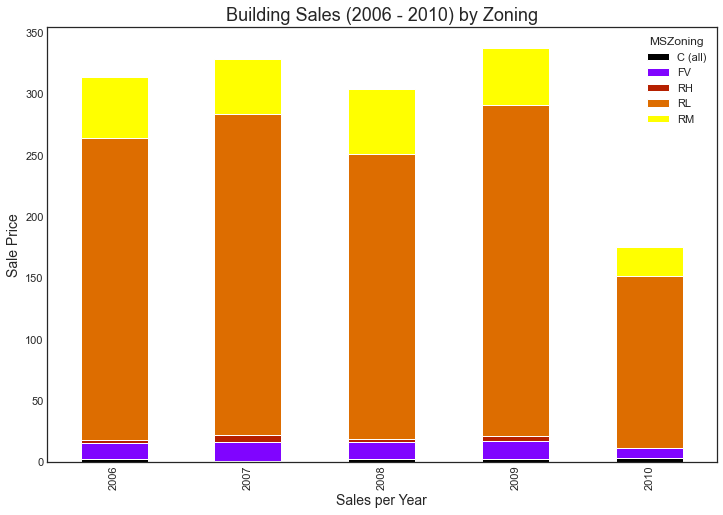

In [59]:
plt.style.use('seaborn-white')
SalesbyZone = housing.groupby(['YrSold','MSZoning']).SalePrice.count()
SalesbyZone.unstack().plot(kind='bar',stacked=True, colormap= 'gnuplot',  
                           grid=False,  figsize=(12,8))
plt.title('Building Sales (2006 - 2010) by Zoning', fontsize=18)
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Sales per Year', fontsize=14)
plt.show()

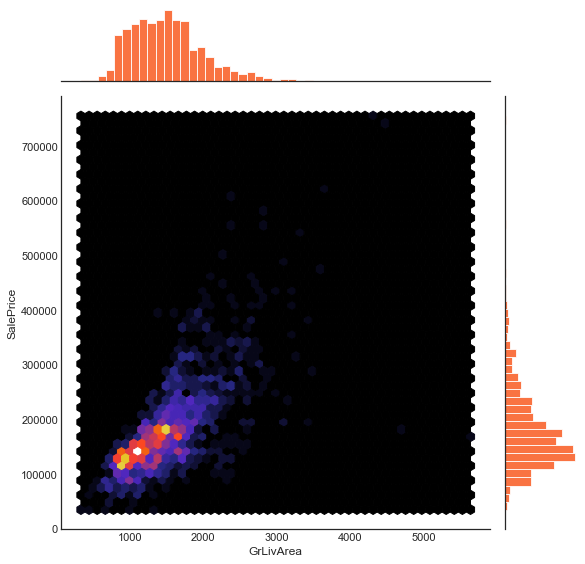

In [60]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=housing,
              kind='hex', cmap= 'CMRmap', height=8, color='#F84403')

plt.show()

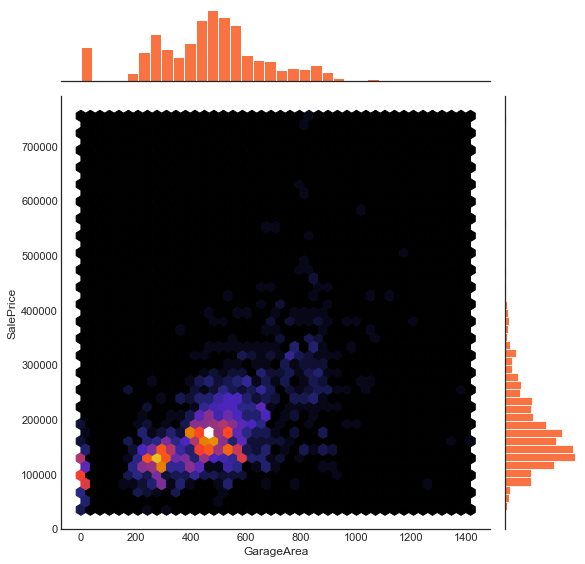

In [61]:
sns.jointplot(x='GarageArea',y='SalePrice',data=housing,
              kind='hex', cmap= 'CMRmap', height=8, color='#F84403')

plt.show()

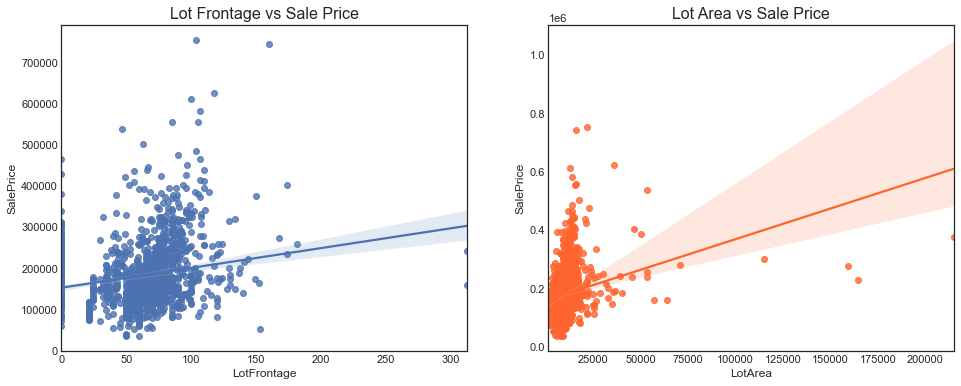

In [62]:
plt.figure(figsize=(16,6))
plt.subplot(121)
ax = sns.regplot(x="LotFrontage", y="SalePrice", data=housing)
ax.set_title("Lot Frontage vs Sale Price", fontsize=16)

plt.subplot(122)
ax1 = sns.regplot(x="LotArea", y="SalePrice", data=housing, color='#FE642E')
ax1.set_title("Lot Area vs Sale Price", fontsize=16)

plt.show()

In [63]:
building_df.head()

,MSSubClass,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,Attchd,2003.0,2,2.0,548.0,Feb,2008,WD,Normal,208500.0
1,20,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,Attchd,1976.0,2,2.0,460.0,May,2007,WD,Normal,181500.0
2,60,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,Attchd,2001.0,2,2.0,608.0,Sep,2008,WD,Normal,223500.0
3,70,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,...,Detchd,1998.0,1,3.0,642.0,Feb,2006,WD,Abnorml,140000.0
4,60,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,Attchd,2000.0,2,3.0,836.0,Dec,2008,WD,Normal,250000.0


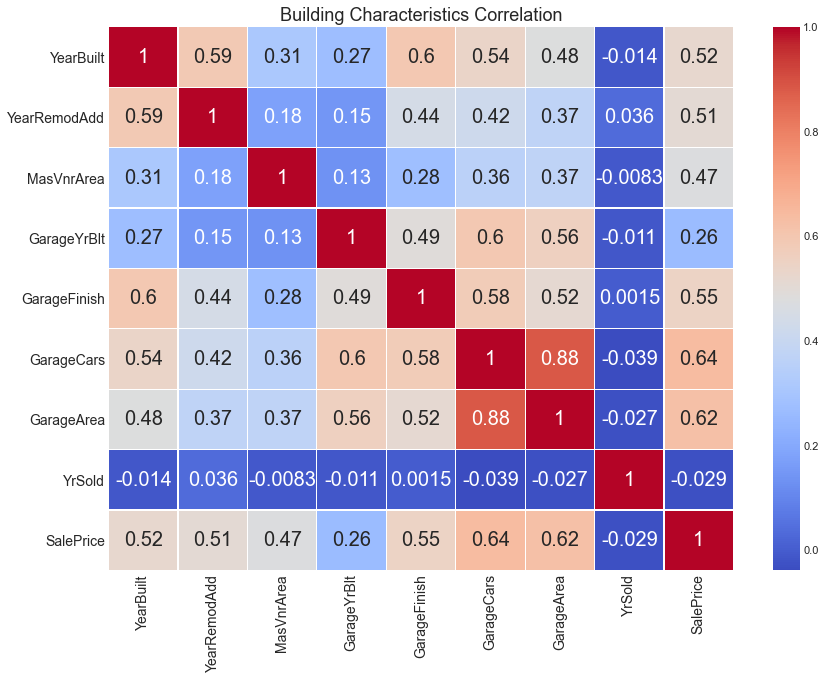

In [64]:
corr = building_df.corr()

g = sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':20})
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 8)
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title("Building Characteristics Correlation", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

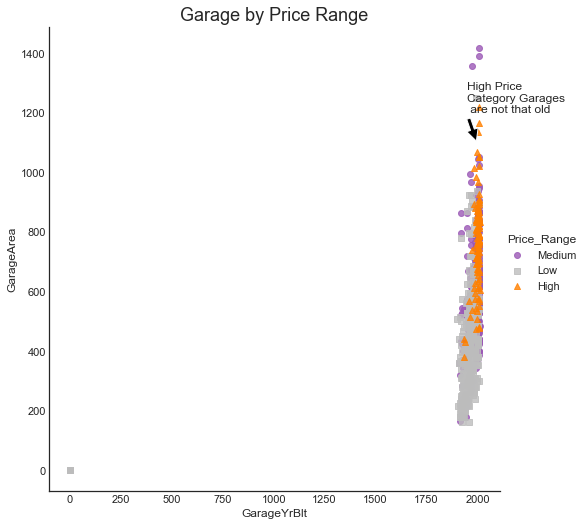

In [65]:

housing['Price_Range'] = np.nan
lst = [housing]
for column in lst:
    column.loc[column['SalePrice'] < 150000, 'Price_Range'] = 'Low'
    column.loc[(column['SalePrice'] >= 150000) & (column['SalePrice'] <= 300000), 'Price_Range'] = 'Medium'
    column.loc[column['SalePrice'] > 300000, 'Price_Range'] = 'High'


import matplotlib.pyplot as plt
palette = ["#9b59b6", "#BDBDBD", "#FF8000"]
sns.lmplot('GarageYrBlt', 'GarageArea', data=housing, hue='Price_Range', fit_reg=False, height=7, palette=palette,
          markers=["o", "s", "^"])
plt.title('Garage by Price Range', fontsize=18)
plt.annotate('High Price \nCategory Garages \n are not that old', xy=(1997, 1100), xytext=(1950, 1200), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

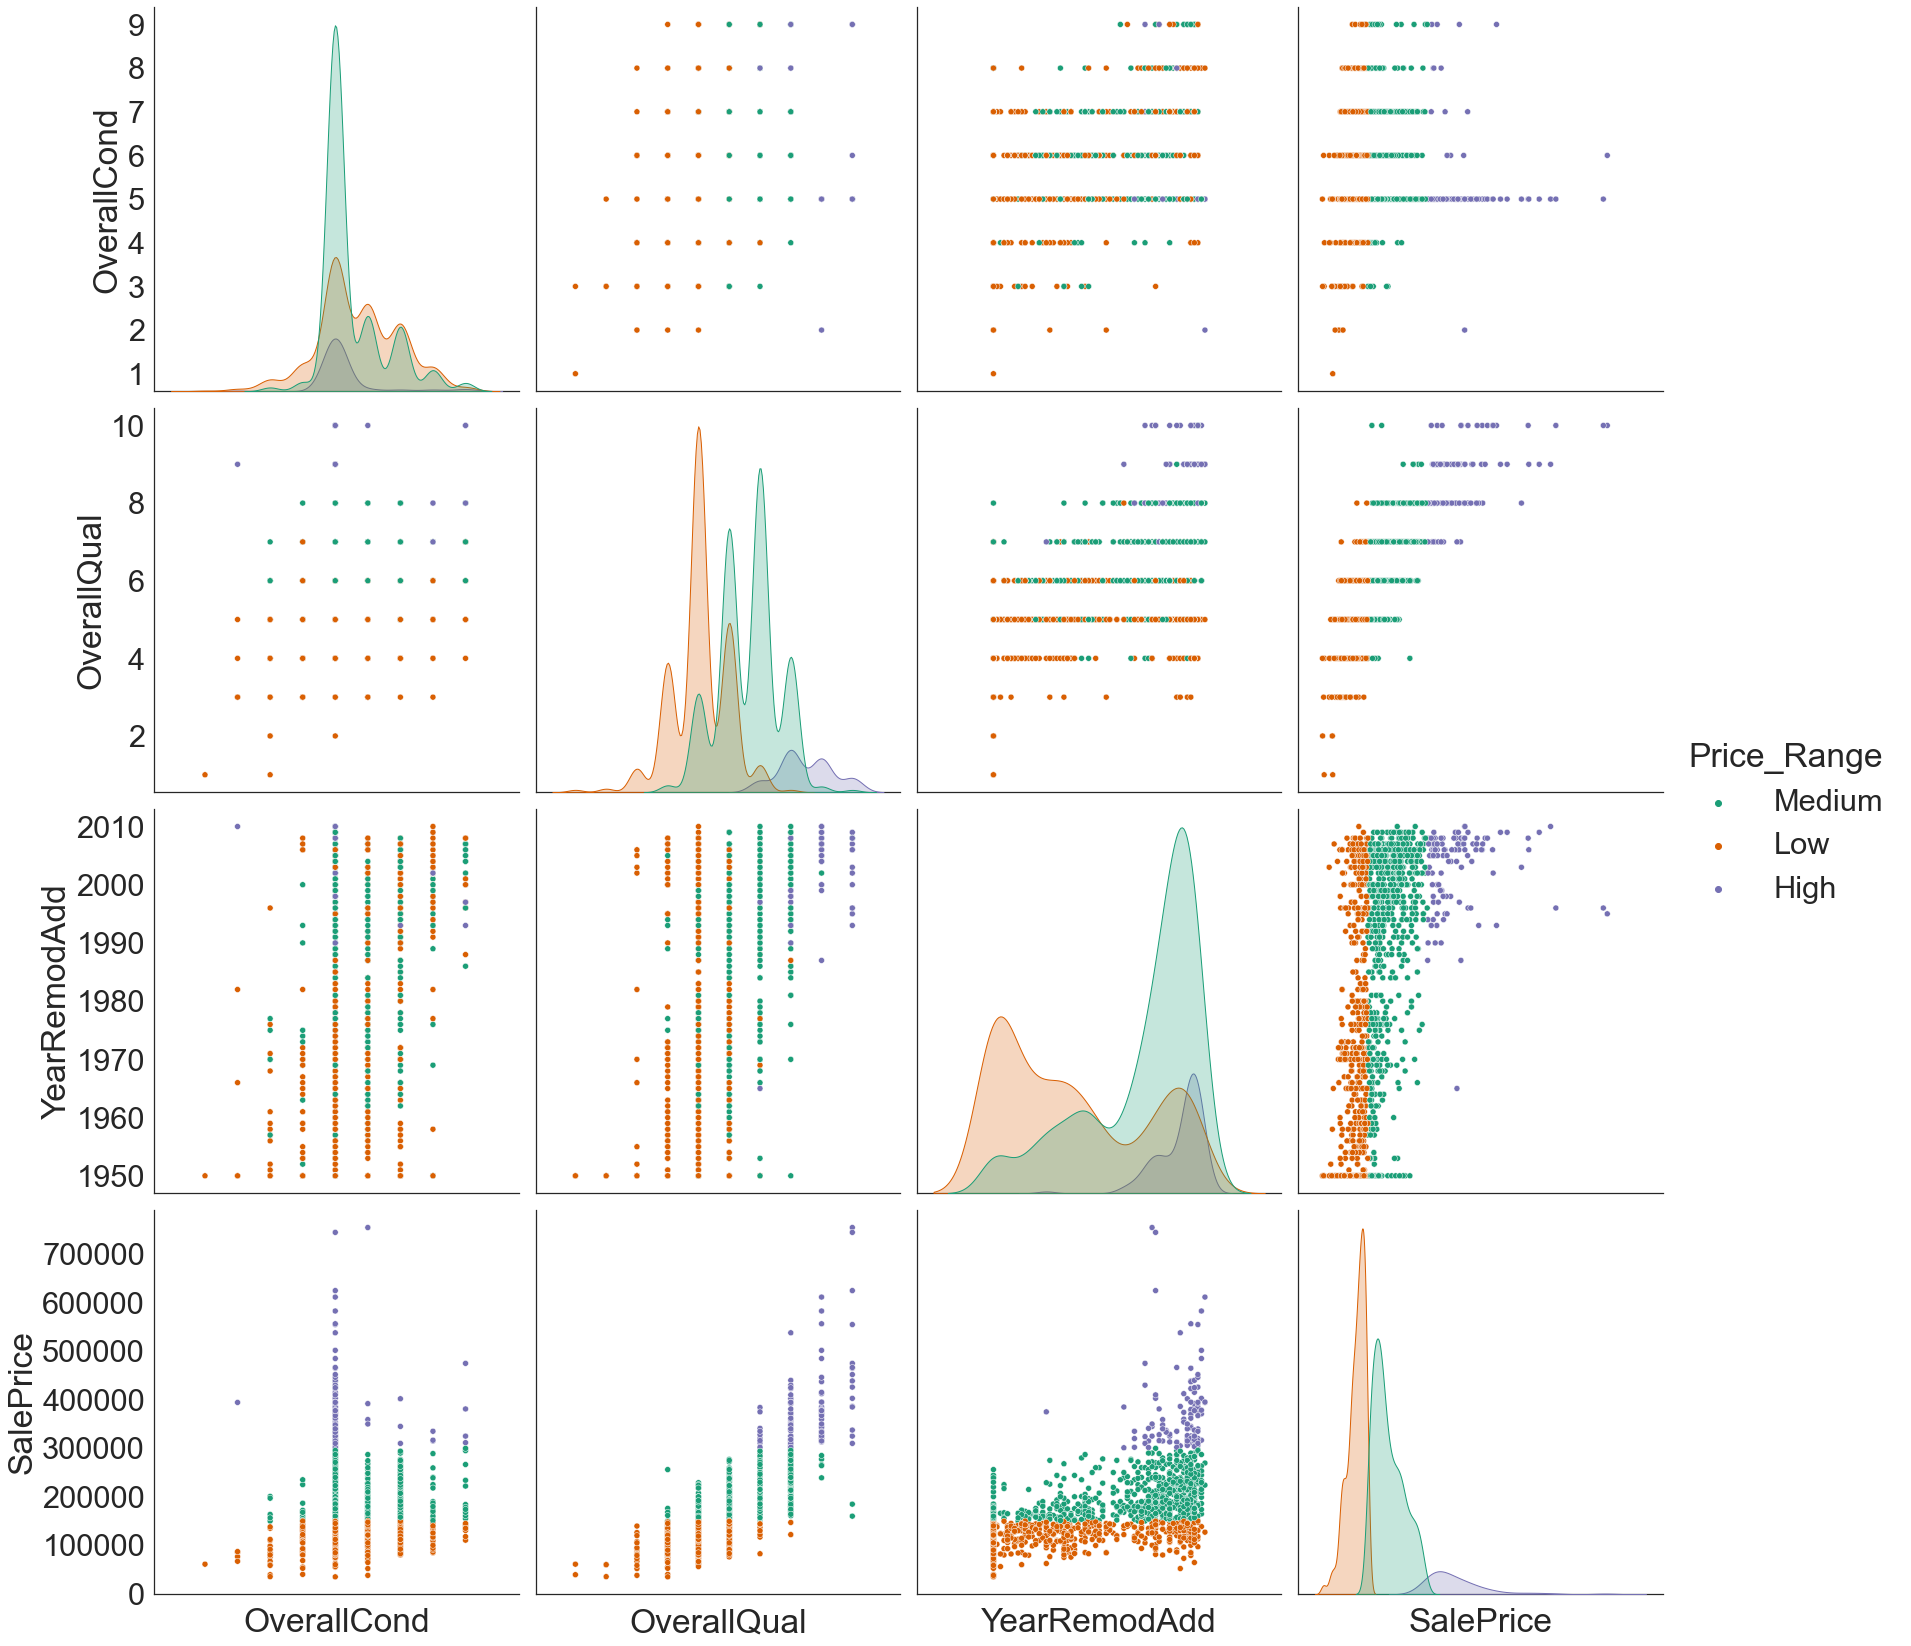

In [66]:
with sns.plotting_context("notebook",font_scale=2.8):
    g = sns.pairplot(housing, vars=["OverallCond", "OverallQual", "YearRemodAdd", "SalePrice"],
                hue="Price_Range", palette="Dark2", height=6)


g.set(xticklabels=[]);

plt.show()

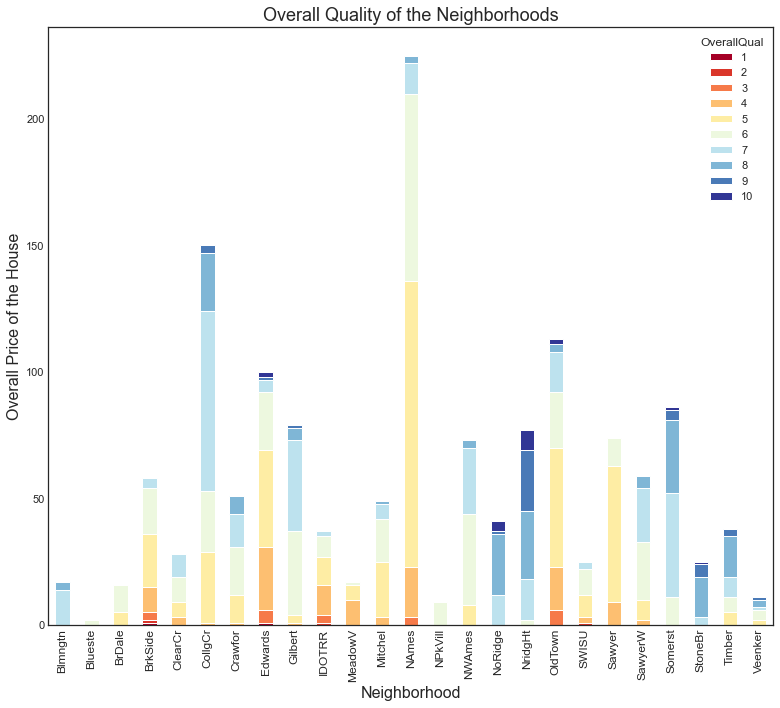

In [67]:
plt.style.use('seaborn-white')
types_foundations = housing.groupby(['Neighborhood', 'OverallQual']).size()
types_foundations.unstack().plot(kind='bar', stacked=True, colormap='RdYlBu', figsize=(13,11), grid=False)
plt.ylabel('Overall Price of the House', fontsize=16)
plt.xlabel('Neighborhood', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.title('Overall Quality of the Neighborhoods', fontsize=18)
plt.show()

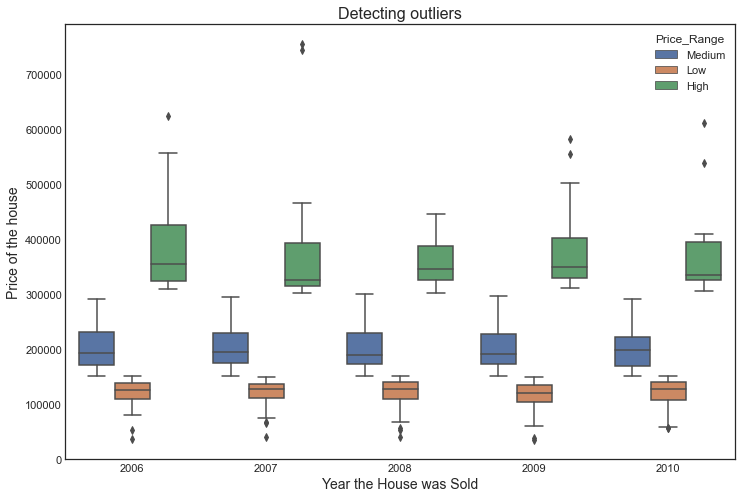

In [68]:
# Most outliers are in the high price category nevertheless, in the year of 2007 saleprice of two houses look extremely high!

fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x="YrSold", y="SalePrice", hue='Price_Range', data=housing)
plt.title('Detecting outliers', fontsize=16)
plt.xlabel('Year the House was Sold', fontsize=14)
plt.ylabel('Price of the house', fontsize=14)
plt.show()

### Taking a Look at the Categorical Variables

In [69]:
obj_features = housing.select_dtypes('object').columns[:-1]
obj_features

Index(['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
       'GarageType', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

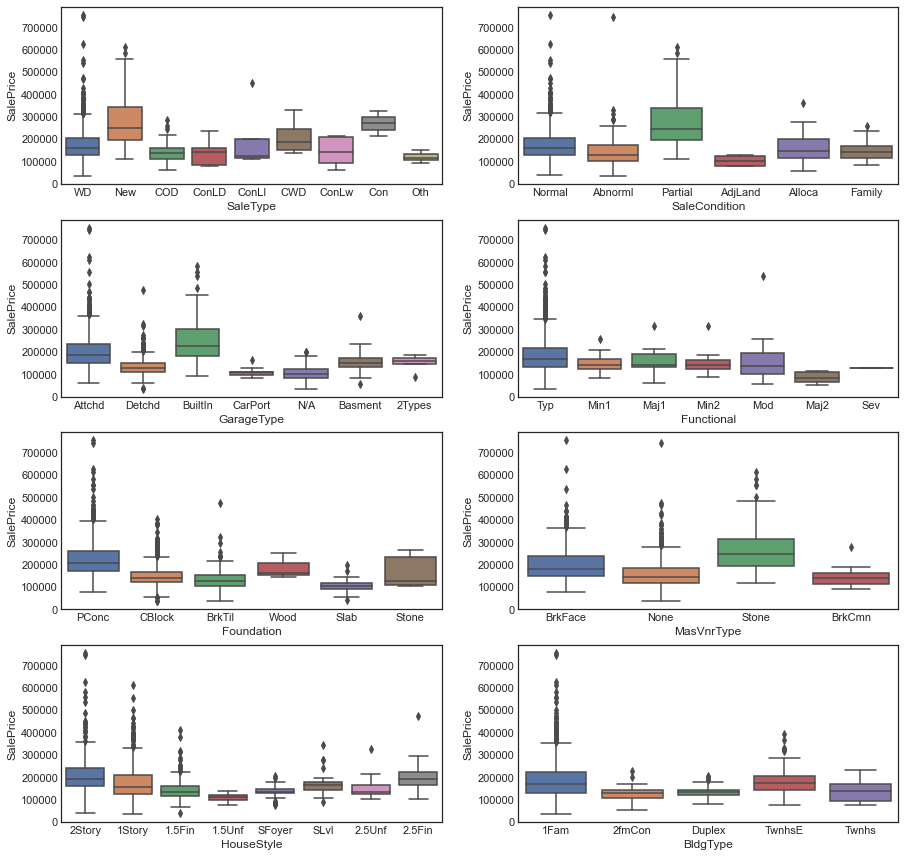

In [70]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for var, subplot in zip(["SaleType","SaleCondition","GarageType","Functional","Foundation","MasVnrType","HouseStyle","BldgType"], ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)

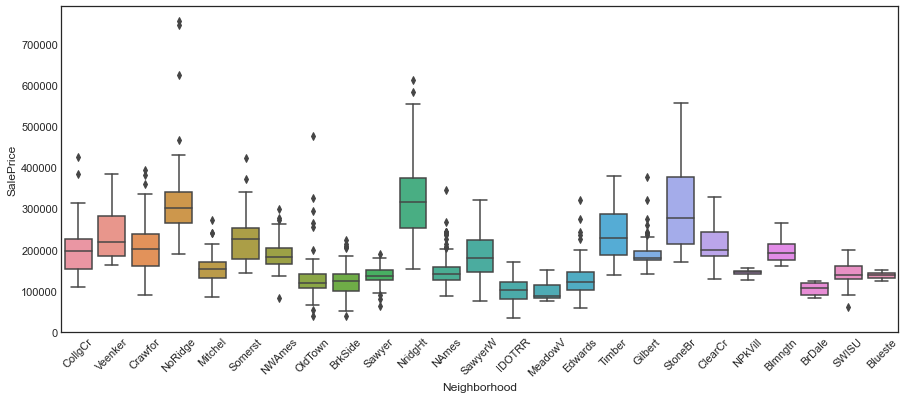

In [71]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
ax = sns.boxplot(x="Neighborhood", y='SalePrice', data=housing)

In [90]:
already_used = ["SaleType","SaleCondition","GarageType","Functional","Foundation","MasVnrType","HouseStyle","BldgType"]
remaining = list(obj_features.copy())
for item in already_used:
    remaining.remove(item)
remaining

['MSSubClass',
 'MSZoning',
 'Street',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Heating',
 'CentralAir',
 'Electrical',
 'PavedDrive',
 'MoSold']

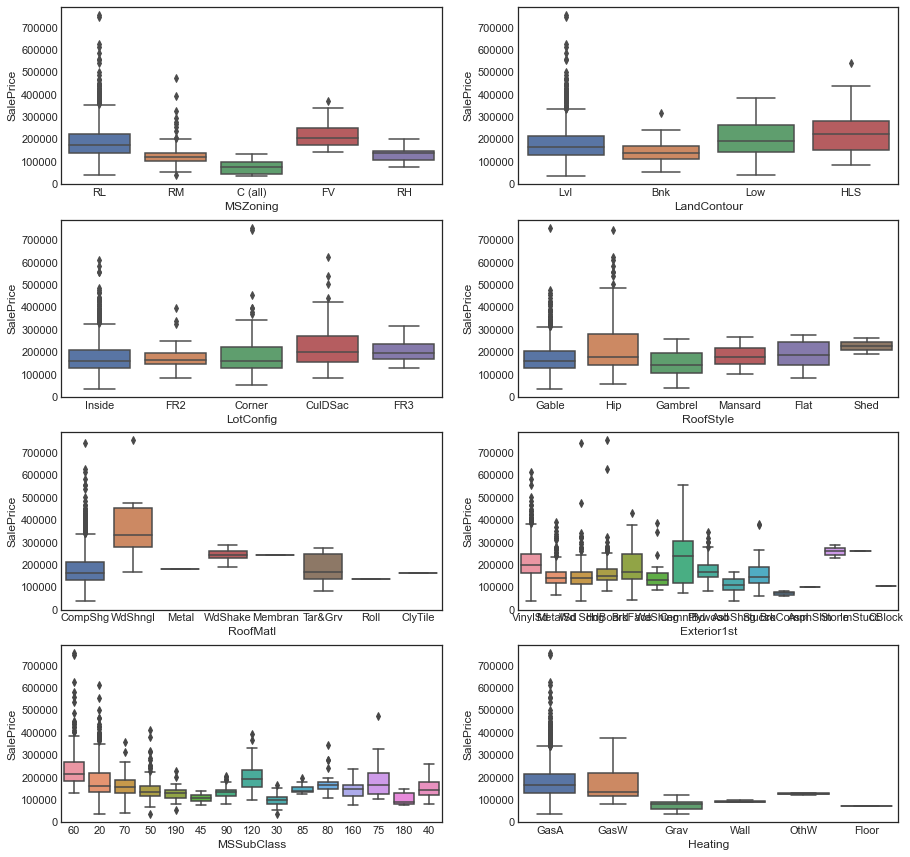

In [91]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for var, subplot in zip(["MSZoning","LandContour","LotConfig","RoofStyle","RoofMatl","Exterior1st","MSSubClass","Heating"], ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)

## 3. Predictive Modeling for Sale Price

In [72]:
#importing modules:
from sklearn import metrics
import numpy as np
#OLS
import statsmodels.api as sm
import statsmodels.formula.api as smf
#train-test
from sklearn.model_selection import train_test_split
#sklearn Lin Reg
from sklearn.linear_model import LinearRegression
#Cross_validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
#standarize X
from sklearn.preprocessing import StandardScaler

### Regression Models

#### Regresssion Models only using the following variables:
- OverallQual
- GrLivArea
- KitchenQual
- GarageArea
- TotalBsmtSF
- BsmtQual

In [73]:
feature_cols = ["OverallQual","GrLivArea","KitchenQual","GarageArea","TotalBsmtSF","BsmtQual"]

In [74]:
#create a function to facilitate comparing different train/splits using sklearn fittted model:
def train_test_metrics(df, feature_df, train_s):
    X = feature_df
    y = df.SalePrice
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_s, random_state=33)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    print('testing metrics:')
    print('-----------------')
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
    print('R-squared: ', metrics.r2_score(y_test, y_pred))
    print('')
    print('training error:')
    print('-----------------')
    print('RMSE: ',(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train)))))
    #print('')
    #print(lr.intercept_)
    #print(lr.coef_)

- Looking at a 75/25 train/test split:

In [75]:
train_test_metrics(housing,housing[feature_cols],.75)

testing metrics:
-----------------
RMSE:  45566.92568330018
MAE:  25413.24192979539
MSE:  2076344716.2274013
R-squared:  0.7032016772808183

training error:
-----------------
RMSE:  34855.665583444126


In [76]:
#Plotting y_test_pred and y_test:
def train_test_metrics(df, feature_df,target, train_s):
    #get test predictions:
    X = feature_df
    y = df[target]
    train_X, test_X, train_y, test_y = train_test_split(X,y,train_size=train_s,random_state=3)
    linreg_ = LinearRegression()
    linreg_.fit(train_X,train_y)
    y_test_pred = linreg_.predict(test_X)
    #graph relationship between y_test and predictions
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.scatterplot(x=test_y, y=y_test_pred)
    sns.lineplot(x=test_y, y=test_y, color='#028f1e',linewidth = 2, ax=ax)
    ax.set_xlabel('y_test')
    ax.set_ylabel('y_test_pred')
    ax.set_title('y_test vs. y_test_pred', fontsize=14)
    plt.show()

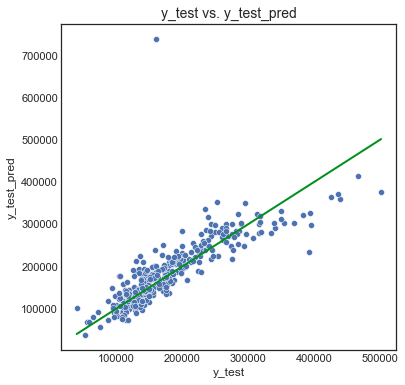

In [77]:
train_test_metrics(housing,housing[feature_cols],'SalePrice',.75)

In [78]:
def cross_validation_kfolds (df,features,target,num_fold):
    X = df[features]
    y = df[target]
    
    kf_cross_validation = model_selection.KFold(n_splits=num_fold, shuffle=True, random_state=23)

    for train_index, test_index in kf_cross_validation.split(X, y):
        lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])

        rmse_values=(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
        scores=(lr.score(X.iloc[test_index], y.iloc[test_index]))

        rmse_train=(np.sqrt(metrics.mean_squared_error(y.iloc[train_index], lr.predict(X.iloc[train_index]))))


    print("SUMMARY OF CROSS VALIDATION: {}".format(num_fold))
    print('test metrics:')
    print('--------------')
    print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
    print('Mean of R2 for all folds: {}'.format(np.mean(scores)))
    print('')
    print('train metric:')
    print('---------------')
    print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_train)))

In [79]:
cross_validation_kfolds(housing,feature_cols,"SalePrice",10)

SUMMARY OF CROSS VALIDATION: 10
test metrics:
--------------
Mean of RMSE for all folds: 40059.85448602603
Mean of R2 for all folds: 0.7152920297888318

train metric:
---------------
Mean of RMSE for all folds: 37277.35446156947


#### Regresssion Models only using all numerical variables:
This showcases that using all numerical variables doesn't necessarily mean it'll improve the model.

In [80]:
num_features = housing.select_dtypes('number').columns[:-1]
num_features

Index(['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold'],
      dtype='object')

In [81]:
cross_validation_kfolds(housing,list(num_features),"SalePrice",10)

SUMMARY OF CROSS VALIDATION: 10
test metrics:
--------------
Mean of RMSE for all folds: 40924.55236772251
Mean of R2 for all folds: 0.7028684517889814

train metric:
---------------
Mean of RMSE for all folds: 32359.71677411892


In [82]:
cross_validation_kfolds(housing,["OverallQual","GrLivArea","GarageArea","KitchenQual","BsmtQual","OverallCond"],"SalePrice",10)

SUMMARY OF CROSS VALIDATION: 10
test metrics:
--------------
Mean of RMSE for all folds: 40091.44068859854
Mean of R2 for all folds: 0.7148428824290274

train metric:
---------------
Mean of RMSE for all folds: 38040.30510838008
